In [ ]:
# TODO еще раз проверить корректность используемых терминов, уточнить этапы
# TODO убрать английский

### Exploratory Data Analysis / Разведывательный анализ данных

На этом этапе:
1. Получение базовой информации  о датасете
2. Построение распределений числовых признаков
3. Простроение распеделений категориальных признаков
4. Сигментация
5. Корреляции
Distributions of numeric features
Distributions of categorical features
Segmentations
Correlations

In [82]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
conn = sqlite3.connect('db\cian_fake_2.db') 
          
df = pd.read_sql_query ('''
                               SELECT
                               flat_type, rooms, price, price_per_meter, sale_type, mortgage, area,
                       living_area, kitchen_area, floor, floors, built_year, address, district, metro_station, seller,
                       housing_type, planning, ceiling_height, bathroom, balcony_loggia, repair, view,
                       finished_shell_condition, house_type, house_class, building_number, parking, elevators,
                       housing_line, floor_type, entrance_number, heating, unsafe_house, garbage_disposal, gas_supply,
                       description_text
                               FROM ad_data
                               ''', conn)


1. Получение базовой информации о датасете

In [6]:
# размерность таблицы
df.shape

(10000, 37)

In [7]:
# типы данных столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   flat_type                 10000 non-null  object 
 1   rooms                     10000 non-null  int64  
 2   price                     10000 non-null  int64  
 3   price_per_meter           10000 non-null  int64  
 4   sale_type                 10000 non-null  object 
 5   mortgage                  10000 non-null  int64  
 6   area                      10000 non-null  float64
 7   living_area               10000 non-null  float64
 8   kitchen_area              10000 non-null  float64
 9   floor                     10000 non-null  int64  
 10  floors                    10000 non-null  int64  
 11  built_year                10000 non-null  int64  
 12  address                   10000 non-null  object 
 13  district                  10000 non-null  object 
 14  metro_s

Наблюдения характеризуются 37 признаками: числовыми и категориальными.
Фильтрация категориальный признаков:

In [8]:
print(df.dtypes[df.dtypes=='object'])
print(f"Всего {len(df.dtypes[df.dtypes=='object'])} категориальных признаков")

flat_type                   object
sale_type                   object
address                     object
district                    object
metro_station               object
seller                      object
housing_type                object
planning                    object
bathroom                    object
balcony_loggia              object
repair                      object
view                        object
finished_shell_condition    object
house_type                  object
house_class                 object
parking                     object
elevators                   object
housing_line                object
floor_type                  object
heating                     object
unsafe_house                object
garbage_disposal            object
gas_supply                  object
description_text            object
dtype: object
Всего 24 категориальных признаков


In [9]:
# первые 10 строк фрейма данных
df.head(10)

,flat_type,rooms,price,price_per_meter,sale_type,mortgage,area,living_area,kitchen_area,floor,...,parking,elevators,housing_line,floor_type,entrance_number,heating,unsafe_house,garbage_disposal,gas_supply,description_text
0,апартаменты,5,93802430,1874174,свободная продажа,1,50.05,23.98,37.82,11,...,подземная,elevators '0',housing_line '0',деревянные,11,heating '0',да,нет,нет,description text '0'
1,апартаменты,5,11455370,129206,свободная продажа,0,88.66,80.55,26.91,34,...,наземная,elevators '1',housing_line '1',деревянные,8,heating '1',да,None,None,description text '1'
2,квартира,0,50054984,3792044,альтернатива,0,13.20,5.39,6.44,1,...,None,elevators '2',housing_line '2',деревянные,15,heating '2',нет,нет,да,description text '2'
3,квартира,1,53094819,789045,долевое участие (214-фз),1,67.29,12.50,59.76,25,...,наземная,elevators '3',housing_line '3',железобетонные,6,heating '3',None,да,да,description text '3'
4,апартаменты,4,28843249,624313,альтернатива,0,46.20,44.29,8.38,11,...,None,elevators '4',housing_line '4',деревянные,3,heating '4',нет,да,да,description text '4'
5,квартира,2,33874006,502805,свободная продажа,0,67.37,57.66,27.07,5,...,подземная,elevators '5',housing_line '5',деревянные,13,heating '5',None,да,нет,description text '5'
6,квартира,5,54846839,773799,долевое участие (214-фз),1,70.88,50.99,48.25,7,...,стихийная,elevators '6',housing_line '6',железобетонные,3,heating '6',None,None,None,description text '6'
7,апартаменты,6,37703091,2832689,свободная продажа,1,13.31,5.22,3.92,22,...,стихийная,elevators '7',housing_line '7',железобетонные,14,heating '7',нет,нет,нет,description text '7'
8,квартира,6,10105173,515044,альтернатива,0,19.62,5.61,10.91,5,...,наземная,elevators '8',housing_line '8',железобетонные,3,heating '8',нет,нет,None,description text '8'
9,квартира,0,48592562,950931,долевое участие (214-фз),0,51.10,6.61,22.12,36,...,None,elevators '9',housing_line '9',железобетонные,1,heating '9',нет,нет,да,description text '9'


In [11]:
# последние 10 строк фрема данных
df.tail(10)

,flat_type,rooms,price,price_per_meter,sale_type,mortgage,area,living_area,kitchen_area,floor,...,parking,elevators,housing_line,floor_type,entrance_number,heating,unsafe_house,garbage_disposal,gas_supply,description_text
9990,квартира,-1,86168077,2646440,свободная продажа,1,32.56,19.50,10.97,39,...,None,elevators '9990',housing_line '9990',деревянные,3,heating '9990',да,да,да,description text '9990'
9991,апартаменты,3,46088674,1801746,долевое участие (214-фз),1,25.58,18.59,24.72,26,...,наземная,elevators '9991',housing_line '9991',None,15,heating '9991',нет,нет,None,description text '9991'
9992,апартаменты,6,89563355,2504568,долевое участие (214-фз),1,35.76,25.13,34.35,26,...,None,elevators '9992',housing_line '9992',железобетонные,1,heating '9992',None,да,None,description text '9992'
9993,апартаменты,3,79598064,2007011,свободная продажа,1,39.66,30.83,39.23,15,...,наземная,elevators '9993',housing_line '9993',None,6,heating '9993',None,None,None,description text '9993'
9994,квартира,4,76300183,3042272,альтернатива,0,25.08,14.25,17.79,13,...,наземная,elevators '9994',housing_line '9994',None,2,heating '9994',да,да,нет,description text '9994'
9995,апартаменты,0,15258292,217727,свободная продажа,1,70.08,34.14,65.50,27,...,стихийная,elevators '9995',housing_line '9995',деревянные,15,heating '9995',да,None,None,description text '9995'
9996,квартира,-1,36213144,518442,альтернатива,0,69.85,65.38,13.84,17,...,None,elevators '9996',housing_line '9996',деревянные,6,heating '9996',нет,None,None,description text '9996'
9997,апартаменты,5,60802097,1140966,долевое участие (214-фз),1,53.29,16.02,51.38,20,...,None,elevators '9997',housing_line '9997',None,11,heating '9997',None,да,нет,description text '9997'
9998,квартира,4,6213537,135934,долевое участие (214-фз),1,45.71,44.79,43.06,13,...,None,elevators '9998',housing_line '9998',железобетонные,4,heating '9998',да,None,да,description text '9998'
9999,квартира,-1,73041341,2100096,свободная продажа,1,34.78,22.00,22.47,15,...,None,elevators '9999',housing_line '9999',None,13,heating '9999',да,да,да,description text '9999'


In [25]:
# проверка на наличие пропущенных значений для каждого столбца
print(df.isnull().any())

flat_type                   False
rooms                       False
price                       False
price_per_meter             False
sale_type                   False
mortgage                    False
area                        False
living_area                 False
kitchen_area                False
floor                       False
floors                      False
built_year                  False
address                     False
district                    False
metro_station               False
seller                      False
housing_type                 True
planning                     True
ceiling_height              False
bathroom                    False
balcony_loggia              False
repair                       True
view                         True
finished_shell_condition     True
house_type                   True
house_class                  True
building_number              True
parking                      True
elevators                   False
housing_line  

<AxesSubplot:>

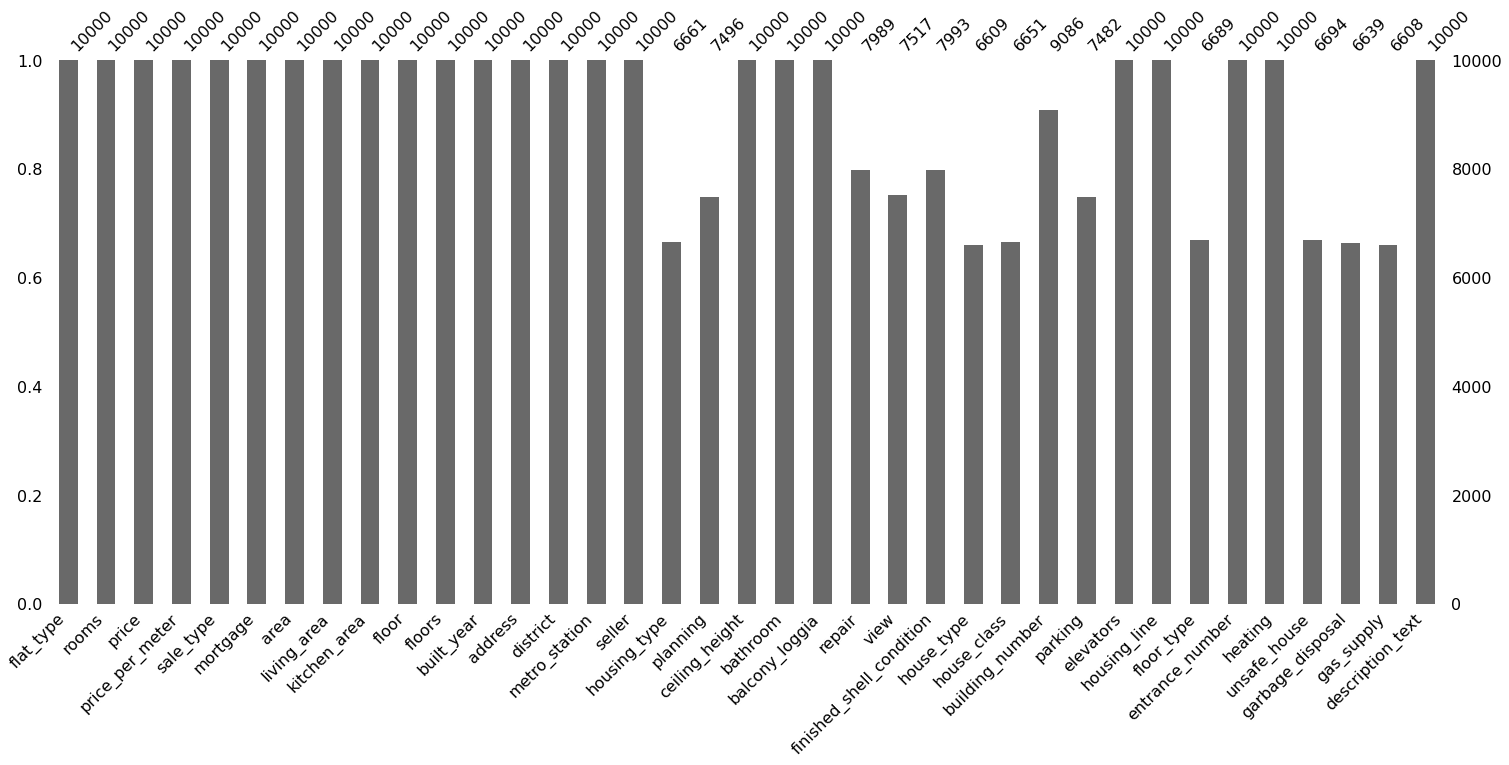

In [28]:
# гистограмма непропущенных значений для каждого столбца
msno.bar(df)

2. Построение распределений числовых признаков

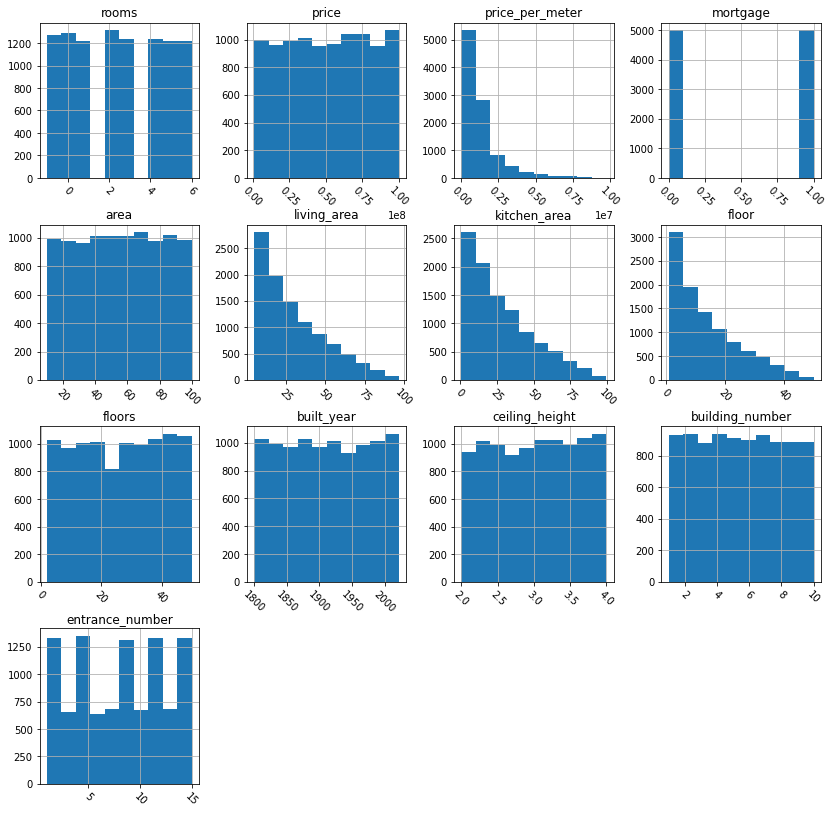

In [12]:
# гистограммы
df.hist(figsize=(14,14), xrot=-45)
plt.show()

In [ ]:
# TODO написать аналогичный вывод

Observations: We can make out quite a few observations:

For example, consider the histogram for num_schools:

More than 1500 houses have 3 schools with a mile
Consider the histogram for sqft:

More than 400 houses have area within 2000 sqft
Very few houses have area more than 5000 sqft
Consider the histogram for beds:

Over 600 houses have 4 bedrooms, and similar number of houses have 3 bedrooms.
Less than 100 houses have one bedroom and so on.
Also, look at the plot for the 'year_built' feature:

The last bin in the histogram represents the range 2010-2020.
Since this dataset was pulled in 2016, we should not have properties built in 2019.
A property built after 2016 would be a measurement error.
However, because of the 10-year bins, it's hard to tell if there's a measurement error just from the plot above.

In [13]:
# описательная статистика для числовых столбцов
df.describe()

,rooms,price,price_per_meter,mortgage,area,living_area,kitchen_area,floor,floors,built_year,ceiling_height,building_number,entrance_number
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9086.000000,10000.00000
mean,2.462100,5.089354e+07,1.301443e+06,0.499900,55.165608,30.119376,28.358372,13.558600,26.249300,1911.378000,3.013257,5.458838,8.01380
std,2.288381,2.866259e+07,1.331777e+06,0.500025,25.908937,20.703398,21.925608,11.252121,14.235569,64.618657,0.579840,2.869652,4.32815
min,-1.000000,1.013837e+06,1.121900e+04,0.000000,10.000000,5.010000,1.000000,1.000000,2.000000,1800.000000,2.000000,1.000000,1.00000
25%,0.000000,2.620475e+07,4.702058e+05,0.000000,32.627500,13.040000,10.370000,4.000000,14.000000,1855.000000,2.510000,3.000000,4.00000
50%,2.000000,5.123650e+07,9.241315e+05,0.000000,55.290000,24.775000,22.705000,10.000000,26.000000,1911.000000,3.030000,5.000000,8.00000
75%,4.000000,7.553259e+07,1.583356e+06,1.000000,77.462500,43.072500,41.390000,20.000000,39.000000,1967.250000,3.520000,8.000000,12.00000
max,6.000000,9.998752e+07,9.751043e+06,1.000000,100.000000,96.860000,99.310000,50.000000,50.000000,2022.000000,4.000000,10.000000,15.00000


In [ ]:
# TODO todo написать аналогичный вывод

Look at the 'year_built' column, we can see that its max value is 2015.
The 'basement' feature has some missing values, also its standard deviation is 0.0, while its min and max are both 1.0. Maybe this is a feature that should be binary consisting values 0 and 1.

2. Построение распределений категориальных данных

In [14]:
# описательная статистика для категориальных столбцов
df.describe(include=['object'])

,flat_type,sale_type,address,district,metro_station,seller,housing_type,planning,bathroom,balcony_loggia,...,house_class,parking,elevators,housing_line,floor_type,heating,unsafe_house,garbage_disposal,gas_supply,description_text
count,10000,10000,10000,10000,10000,10000,6661,7496,10000,10000,...,6651,7482,10000,10000,6689,10000,6694,6639,6608,10000
unique,2,3,10000,9,33,3317,2,3,10000,10000,...,2,3,10000,10000,2,10000,2,2,2,10000
top,апартаменты,свободная продажа,fake address '0',ЮВАО,Тульская,застройщик,вторичное,смежная,bathroom '0',balcony_loggia '0',...,бизнес,подземная,elevators '0',housing_line '0',железобетонные,heating '0',да,да,да,description text '0'
freq,5051,3353,1,1155,331,3357,3331,2521,1,1,...,3399,2538,1,1,3384,1,3358,3402,3329,1


In [ ]:
# TODO ВЫВОД

'exterior_walls' and 'roof' have missing values
There are 16 unique classes for 'exterior_walls' and 'roof'
The most frequent element for exterior_walls is 'Brick'and it has come 687 times.

<AxesSubplot:xlabel='count', ylabel='finished_shell_condition'>

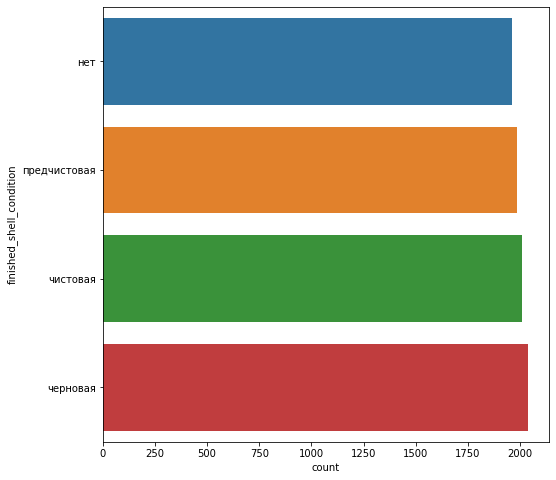

In [40]:
# TODO уточнить, гистограммы каких именно признаков нужно строить УДАЛИТЬ
# гистограмма столбца с пропущенными значениями
plt.figure(figsize=(8,8))
sns.countplot(y='finished_shell_condition', data=df)

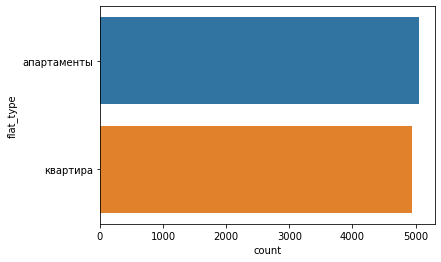

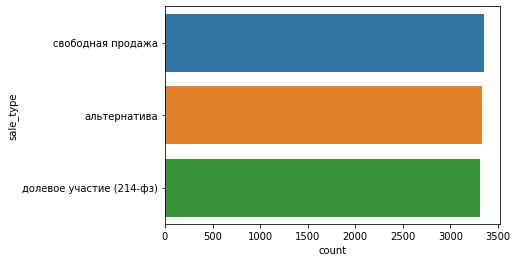

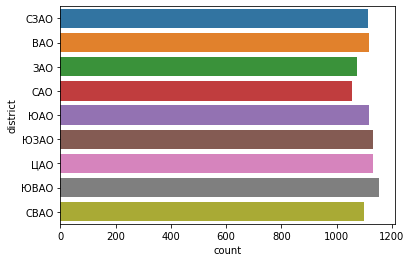

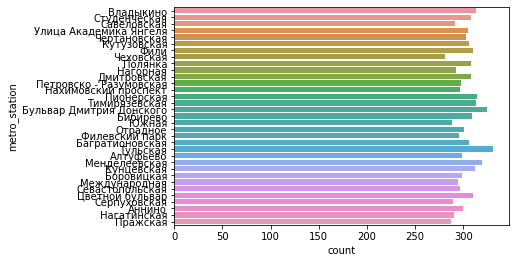

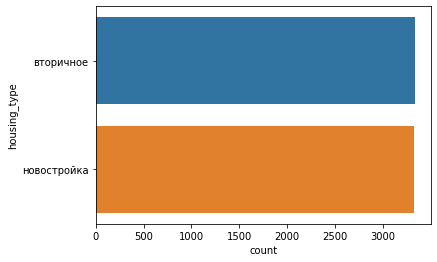

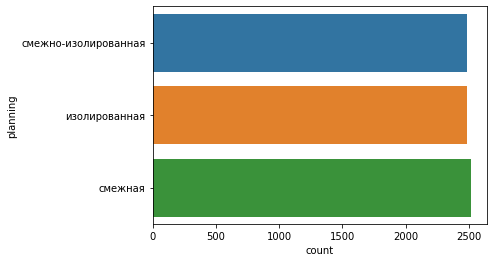

In [78]:
# когда в столбцах не будет 10_000 уникальных значений, построить все графики
categorical_features = df.dtypes[df.dtypes == 'object'].index
categorical_features_not_unique = [categorical_features[0], categorical_features[1], categorical_features[3], categorical_features[4],  categorical_features[6], categorical_features[7]]
for feature in categorical_features_not_unique:
    sns.countplot(y=feature, data=df)
    plt.show()

ВЫВОД 'exterior_walls' and 'roof' suffer from sparse classes.

4. Сигментация

<AxesSubplot:xlabel='area', ylabel='flat_type'>

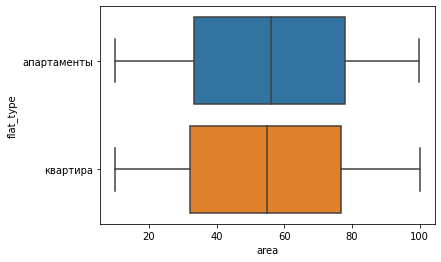

In [79]:
sns.boxplot(x = 'area', y = 'flat_type', data= df)

In [83]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby('flat_type').agg([np.mean,np.std])

C:\Temp/ipykernel_6996/499577150.py:2: FutureWarning: ['sale_type', 'address', 'district', 'metro_station', 'seller', 'housing_type', 'planning', 'bathroom', 'balcony_loggia', 'repair', 'view', 'finished_shell_condition', 'house_type', 'house_class', 'parking', 'elevators', 'housing_line', 'floor_type', 'heating', 'unsafe_house', 'garbage_disposal', 'gas_supply', 'description_text'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('flat_type').agg([np.mean,np.std])


rooms                   price               price_per_meter  \
                 mean       std          mean           std            mean   
flat_type                                                                     
апартаменты  2.446842  2.280024  5.058341e+07  2.852075e+07    1.283086e+06   
квартира     2.477672  2.297004  5.121006e+07  2.880607e+07    1.320178e+06   

                           mortgage                 area             ...  \
                      std      mean       std       mean        std  ...   
flat_type                                                            ...   
апартаменты  1.317321e+06  0.500495  0.500049  55.500750  25.906788  ...   
квартира     1.346246e+06  0.499293  0.500050  54.823558  25.909279  ...   

                floors              built_year            ceiling_height  \
                  mean        std         mean        std           mean   
flat_type                                                                  
апартаменты  26.288854  14.190190  1912.222926  64.637026       3.012508   
квартира     26.208931  14.283055  1910.515660  64.595039       3.014021   

                      building_number           entrance_number            
                  std            mean       std            mean       std  
flat_type                                                                  
апартаменты  0.578190        5.485140  2.883872        8.000792  4.332881  
квартира     0.581577        5.432151  2.855224        8.027076  4.323713  

[2 rows x 26 columns]